In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.svm import SVC

In [4]:
from sklearn.datasets import load_iris

In [5]:
iris = load_iris()

In [6]:
df = pd.DataFrame(iris.data,
                  columns=iris.feature_names)

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
x=iris.data

In [29]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [79]:
##1 3,8
##2 2,5
##3 0,7
##4 0,3

## 1)選取sepal length 和	sepal width 

In [21]:
X=x[:,:2]
Y=iris.target

In [26]:
model = SVC(gamma='auto')

In [23]:
x_train, x_test,y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [27]:
model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
xr = np.arange(3,8,0.02)
yr = np.arange(2,5,0.02)

In [50]:
x1,y1 = np.meshgrid(xr,yr)
P = np.c_[x1.ravel(),y1.ravel()]

z = model.predict(P)
Z1 = z.reshape(x1.shape)

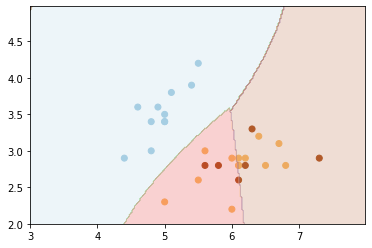

In [51]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap='Paired')
plt.contourf(x1,y1,Z1,cmap='Paired',alpha=0.2)

## 2)選取petal length (cm) 和 petal width (cm)

In [58]:
X=x[:,2:]
Y=iris.target

In [59]:
model = SVC(gamma='auto')
x_train, x_test,y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
model.fit(x_train,y_train)

xr = np.arange(0,7,0.02)
yr = np.arange(0,3,0.02)
x2,y2 = np.meshgrid(xr,yr)
P = np.c_[x2.ravel(),y2.ravel()]

z = model.predict(P)
Z2 = z.reshape(x2.shape)

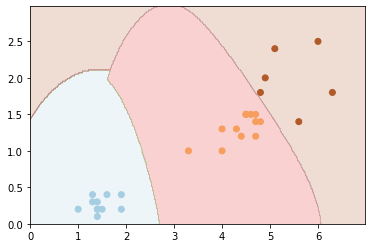

In [60]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap='Paired')
plt.contourf(x2,y2,Z2,cmap='Paired',alpha=0.2)

## 3)選取 sepal length (cm) 和 petal length (cm)

In [71]:
df.drop(['sepal width (cm)','petal width (cm)'],axis=1).head()

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [72]:
df2=df.drop(['sepal width (cm)','petal width (cm)'],axis=1)

In [78]:
X=[]
for i in range(len(df2)):
    for j in range(2):
        X=X+[df2.iloc[i,j]]
X=np.array(X)
X=X.reshape(len(df2),2)
##print(X)

In [75]:
Y = iris.target

In [80]:
model = SVC(gamma='auto')
x_train, x_test,y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
model.fit(x_train,y_train)

xr = np.arange(3,8,0.02)
yr = np.arange(0,7,0.02)
x3,y3 = np.meshgrid(xr,yr)
P = np.c_[x3.ravel(),y3.ravel()]

z = model.predict(P)
Z3 = z.reshape(x3.shape)

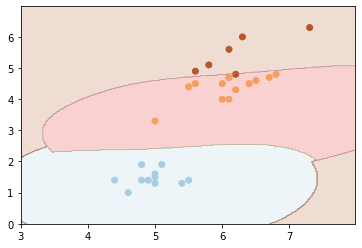

In [82]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap='Paired')
plt.contourf(x3,y3,Z3,cmap='Paired',alpha=0.2)

## 4) 選取sepal length (cm) 和 petal width (cm)

In [83]:
df.drop(['sepal width (cm)','petal length (cm)'],axis=1).head()

,sepal length (cm),petal width (cm)
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2


In [90]:
df2=df.drop(['sepal width (cm)','petal length (cm)'],axis=1)

In [91]:
X=[]
for i in range(len(df2)):
    for j in range(2):
        X=X+[df2.iloc[i,j]]
X=np.array(X)
X=X.reshape(len(df2),2)

In [92]:
Y = iris.target

In [93]:
model = SVC(gamma='auto')
x_train, x_test,y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
model.fit(x_train,y_train)

xr = np.arange(3,8,0.02)
yr = np.arange(0,3,0.02)
x4,y4 = np.meshgrid(xr,yr)
P = np.c_[x4.ravel(),y4.ravel()]

z = model.predict(P)
Z4 = z.reshape(x4.shape)

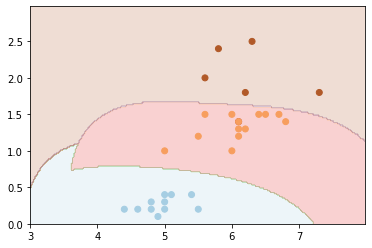

In [94]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap='Paired')
plt.contourf(x4,y4,Z4,cmap='Paired',alpha=0.2)

## 5) 選取sepal width (cm) 和 petal length (cm)

In [108]:
df.drop(['sepal length (cm)','petal width (cm)'],axis=1).head()

,sepal width (cm),petal length (cm)
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4


In [109]:
df2=df.drop(['sepal length (cm)','petal width (cm)'],axis=1)

In [110]:
X=[]
for i in range(len(df2)):
    for j in range(2):
        X=X+[df2.iloc[i,j]]
X=np.array(X)
X=X.reshape(len(df2),2)
Y = iris.target

In [111]:
model = SVC(gamma='auto')
x_train, x_test,y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
model.fit(x_train,y_train)

xr = np.arange(2,5,0.02)
yr = np.arange(0,7,0.02)
x5,y5 = np.meshgrid(xr,yr)
P = np.c_[x5.ravel(),y5.ravel()]

z = model.predict(P)
Z5 = z.reshape(x5.shape)

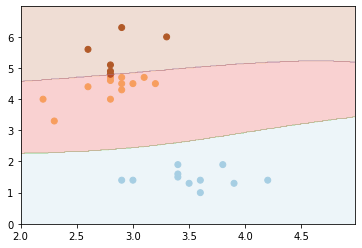

In [112]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap='Paired')
plt.contourf(x5,y5,Z5,cmap='Paired',alpha=0.2)

## 6) 選取 sepal width (cm) 和 petal width (cm)

In [113]:
df.drop(['sepal length (cm)','petal length (cm)'],axis=1).head()

,sepal width (cm),petal width (cm)
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2
3,3.1,0.2
4,3.6,0.2


In [114]:
df2 = df.drop(['sepal length (cm)','petal length (cm)'],axis=1)

In [115]:
X=[]
for i in range(len(df2)):
    for j in range(2):
        X=X+[df2.iloc[i,j]]
X=np.array(X)
X=X.reshape(len(df2),2)
Y = iris.target

In [116]:
model = SVC(gamma='auto')
x_train, x_test,y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
model.fit(x_train,y_train)

xr = np.arange(2,5,0.02)
yr = np.arange(0,3,0.02)
x6,y6 = np.meshgrid(xr,yr)
P = np.c_[x6.ravel(),y6.ravel()]

z = model.predict(P)
Z6 = z.reshape(x6.shape)

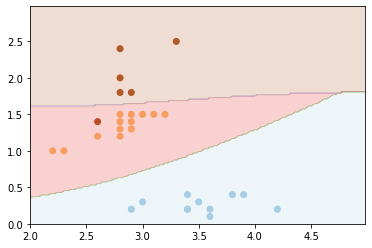

In [117]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap='Paired')
plt.contourf(x6,y6,Z6,cmap='Paired',alpha=0.2)